In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from scipy import ndimage
import PIL.Image

In [2]:
img = cv2.imread("tempkalin.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [10]:
row, col = img.shape
arr = np.array(img)
frame = np.array(img)
hist = np.zeros(256)

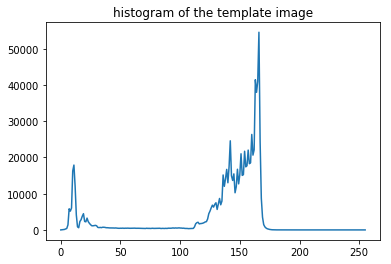

In [14]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.title('histogram of the template image')
plt.plot(hist)
plt.show()

In [26]:
thresh = 200

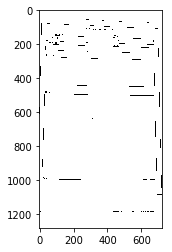

In [34]:
blur = cv2.GaussianBlur(img,(5,5),1)
ret,result = cv2.threshold(blur,thresh,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,3,6)
imgplot = plt.imshow(th3, cmap='gray')

In [35]:
kernel = np.ones((12,12),np.uint8)

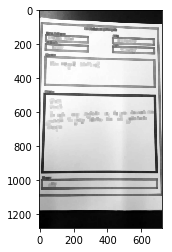

In [36]:
erosion = cv2.erode(blur,kernel,iterations = 1)
erosion = np.array(erosion, dtype=np.uint8)

eroplot = plt.imshow(erosion, cmap='gray')

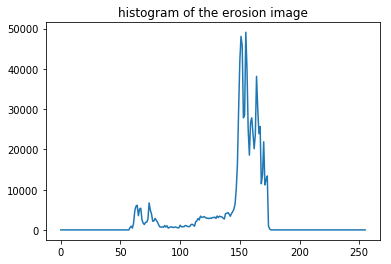

In [9]:
hist = cv2.calcHist([erosion],[0],None,[256],[0,256])
plt.title('histogram of the erosion image')
plt.plot(hist)
plt.show()

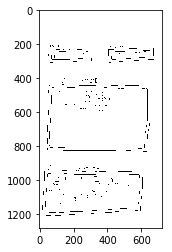

In [10]:
mean = cv2.adaptiveThreshold(erosion,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,5,7)
ret,result = cv2.threshold(mean,thresh,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imgplot = plt.imshow(result, cmap='gray')

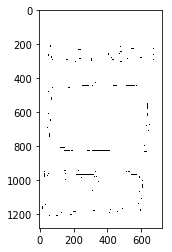

In [11]:
adpgaus = cv2.adaptiveThreshold(erosion,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,5,7)
ret,result = cv2.threshold(adpgaus,thresh,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imgplot = plt.imshow(adpgaus, cmap='gray')

In [12]:
thresh_frame = 220

In [13]:
for i in range(row):
    for j in range(col):
        if(frame[i][j] < thresh):
            frame[i][j] = 0
        elif(frame[i][j] > thresh and frame[i][j] < thresh_frame):
            frame[i][j] = 100
        else:
            frame[i][j] = 255

        if(frame[i][j] > erosion[i][j]):
            frame[i][j] = 0

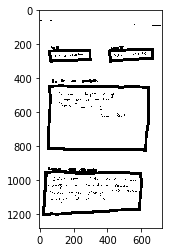

In [14]:
tumor = np.array(frame, dtype=np.uint8)
# s = Image.fromarray(tumor)
# s.save('tumor.jpg')

eroplot = plt.imshow(tumor, cmap='gray')

In [15]:
for i in range(row):
    for j in range(col):
        if(tumor[i][j] < 200):
            tumor[i][j] = 0
        else:
            tumor[i][j] = 255

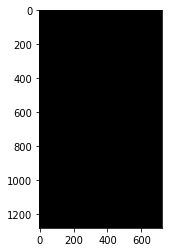

In [16]:
boundary = cv2.morphologyEx(tumor, cv2.MORPH_GRADIENT, kernel)
boundary = np.array(boundary, dtype=np.uint8)
# s = Image.fromarray(boundary)
# s.save('boundary.jpg')

eroplot = plt.imshow(boundary, cmap='gray')

In [17]:
newImg = img.copy()
color_img = cv2.cvtColor(newImg, cv2.COLOR_GRAY2RGB)
for i in range(row):
    for j in range(col):
        if(boundary[i][j] == 255):
            color_img[i][j][0] = 0
            color_img[i][j][0] = 0
            color_img[i][j][0] = 255

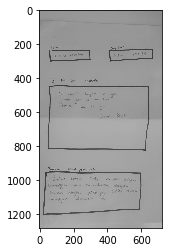

In [18]:
final = np.array(color_img, dtype=np.uint8)
# s = Image.fromarray(final)
# s.save('final.jpg')
finalplot = plt.imshow(final, cmap='gray')